### 데이터 확인

In [1]:
import pandas as pd 
train=pd.read_csv("../datasets/train.csv")
test=pd.read_csv("../datasets/test.csv")
submission = pd.read_csv("../datasets/sample_submission.csv")

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Date          6255 non-null   object 
 3   Temperature   6255 non-null   float64
 4   Fuel_Price    6255 non-null   float64
 5   Promotion1    2102 non-null   float64
 6   Promotion2    1592 non-null   float64
 7   Promotion3    1885 non-null   float64
 8   Promotion4    1819 non-null   float64
 9   Promotion5    2115 non-null   float64
 10  Unemployment  6255 non-null   float64
 11  IsHoliday     6255 non-null   bool   
 12  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 592.6+ KB


In [90]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            180 non-null    int64  
 1   Store         180 non-null    int64  
 2   Date          180 non-null    object 
 3   Temperature   180 non-null    float64
 4   Fuel_Price    180 non-null    float64
 5   Promotion1    178 non-null    float64
 6   Promotion2    45 non-null     float64
 7   Promotion3    161 non-null    float64
 8   Promotion4    146 non-null    float64
 9   Promotion5    180 non-null    float64
 10  Unemployment  180 non-null    float64
 11  IsHoliday     180 non-null    bool   
dtypes: bool(1), float64(8), int64(2), object(1)
memory usage: 15.8+ KB


In [91]:
train.isnull().sum()

id                 0
Store              0
Date               0
Temperature        0
Fuel_Price         0
Promotion1      4153
Promotion2      4663
Promotion3      4370
Promotion4      4436
Promotion5      4140
Unemployment       0
IsHoliday          0
Weekly_Sales       0
dtype: int64

In [92]:
test.isnull().sum()

id                0
Store             0
Date              0
Temperature       0
Fuel_Price        0
Promotion1        2
Promotion2      135
Promotion3       19
Promotion4       34
Promotion5        0
Unemployment      0
IsHoliday         0
dtype: int64

### 결측치 0으로 대체

In [2]:
train.fillna(method="bfill", inplace=True)
test.fillna(method="bfill", inplace=True)


In [4]:
test.isnull().sum()

id              0
Store           0
Date            0
Temperature     0
Fuel_Price      0
Promotion1      0
Promotion2      0
Promotion3      0
Promotion4      0
Promotion5      0
Unemployment    0
IsHoliday       0
dtype: int64

### Date로 부터 월 추출

In [5]:
train["Date"]=train["Date"].astype(str)
train["month"]=pd.DatetimeIndex(train["Date"]).month
test["Date"]=test["Date"].astype(str)
test["month"]=pd.DatetimeIndex(test["Date"]).month

### holiday 1과 0으로 바꾸기

In [6]:
def holiday_to_number(isholiday):
    if isholiday == True:
        number = 1
    else:
        number = 0
    return number

# 이 함수를 IsHoliday 칼럼에 적용한 NumberHoliday 칼럼을 만들어줍니다.
train['IsHoliday'] = train['IsHoliday'].apply(holiday_to_number)
test['IsHoliday'] = test['IsHoliday'].apply(holiday_to_number)

### y_train 생성 및 필요없는 열 제거

In [7]:
y_train=train.Weekly_Sales
train.drop(["id", "Date","Weekly_Sales","Fuel_Price", "Promotion4"], axis=1, inplace=True)
test.drop(["id","Date","Fuel_Price", "Promotion4"], axis=1, inplace=True)

### 상관분석

<AxesSubplot:>

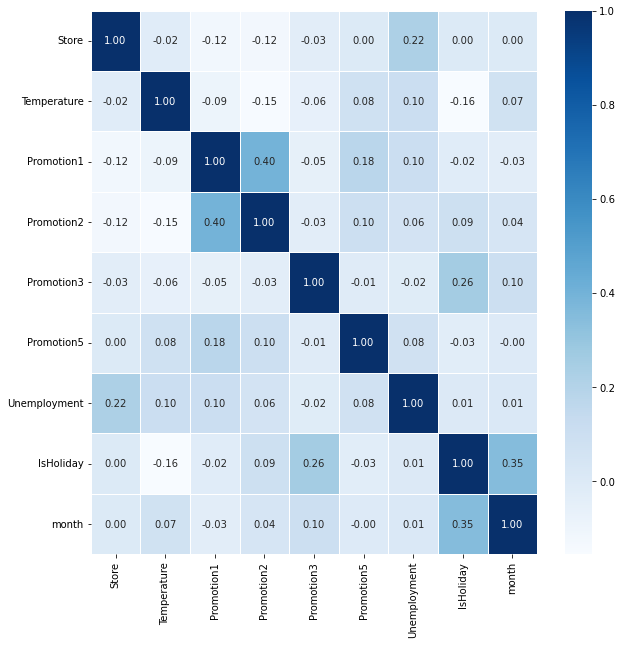

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data = train.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

### 샤피로 윌크 정규성 검정

In [9]:
from scipy import stats
dff=train.columns
for i in dff:   
    train[i]=train[i].astype(float) 
    print(stats.shapiro(train[i]))

ShapiroResult(statistic=0.9536989331245422, pvalue=1.3302246062142623e-40)
ShapiroResult(statistic=0.9793635606765747, pvalue=3.394245693219697e-29)
ShapiroResult(statistic=0.8700075745582581, pvalue=0.0)
ShapiroResult(statistic=0.7385878562927246, pvalue=0.0)
ShapiroResult(statistic=0.0704120397567749, pvalue=0.0)
ShapiroResult(statistic=0.5737245082855225, pvalue=0.0)
ShapiroResult(statistic=0.8989707231521606, pvalue=0.0)
ShapiroResult(statistic=0.281571626663208, pvalue=0.0)
ShapiroResult(statistic=0.9505323767662048, pvalue=1.267754720674662e-41)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### 다중공선성 VIF 확인

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    train.values, i) for i in range(train.shape[1])]
vif["features"] = train.columns
vif

,VIF Factor,features
0,4.322697,Store
1,9.598641,Temperature
2,2.656546,Promotion1
3,1.933528,Promotion2
4,1.090397,Promotion3
5,2.050122,Promotion5
6,13.891071,Unemployment
7,1.350348,IsHoliday
8,5.110475,month


In [14]:

import pandas as pd
# train = pd.read_csv("./data/t2-2-train.csv")
# test= pd.read_csv("./data/t2-2-test.csv")
# y_train = pd.read_csv("./data/t2-2-y_train.csv")


import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, confusion_matrix, mean_absolute_error



cols=train.columns

st= StandardScaler()
st.fit(train)
train_st=st.transform(train)

st.fit(test)
test_st=st.transform(test)

train=pd.DataFrame(train_st,columns=cols)
test=pd.DataFrame(test_st, columns=cols)

X_tr,X_val, y_tr, y_val = train_test_split(train,y_train, test_size=0.2, random_state=2022)

# print(train.shape)
# print(test.shape)

# rf = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=2022)
# rf.fit(X_tr,y_tr)
# pred=rf.predict(X_val)
# print(r2_score(y_val,pred))

# y_pred=rf.predict(test)


# DecisionTreeRegressor
# dc = DecisionTreeRegressor(max_depth=10, random_state=2022)
# dc.fit(X_tr, y_tr)
# pred=dc.predict(X_val)
# print(r2_score(y_val, pred))


import xgboost as xgb
from sklearn.metrics import r2_score
xgb_model = xgb.XGBRegressor(n_estimators=300, max_depth=10, learning_rate=0.05, n_jobs=-1)
xgb_model.fit(train, y_train, eval_set = [(X_val, y_val)], early_stopping_rounds=30, verbose=0)
pred=xgb_model.predict(X_val)
print(r2_score(y_val, pred))
ids=submission.id

# submissions_01 = pd.DataFrame({"id":ids,"Weekly_Sales":pred})
# submissions_01.to_csv("submission_03.csv", index=False)

0.9977481947816091
